2020-02-12T10:59:59+01:00

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
torch 1.4.0
POLO not installed

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : 5a6d47235a8d457b8d29d0ecc05283d5bec1c91b
Git repo   : https://github.com/bicv/POLO/
Git branch : master
800px-Fox_Hunt_1893_Winslow_Homer.jpg
homer.jpg
i05june05_static_street_boston_p1010764.jpeg*
i05june05_static_street_boston_p1010764.npy
i05june05_static_street_boston_p1010785.jpeg*
i05june05_static_street_boston_p1010800.jpeg*
i05june05_static_street_boston_p1010806.jpeg*
i05june05_static_street_boston_p1010808.jpeg*


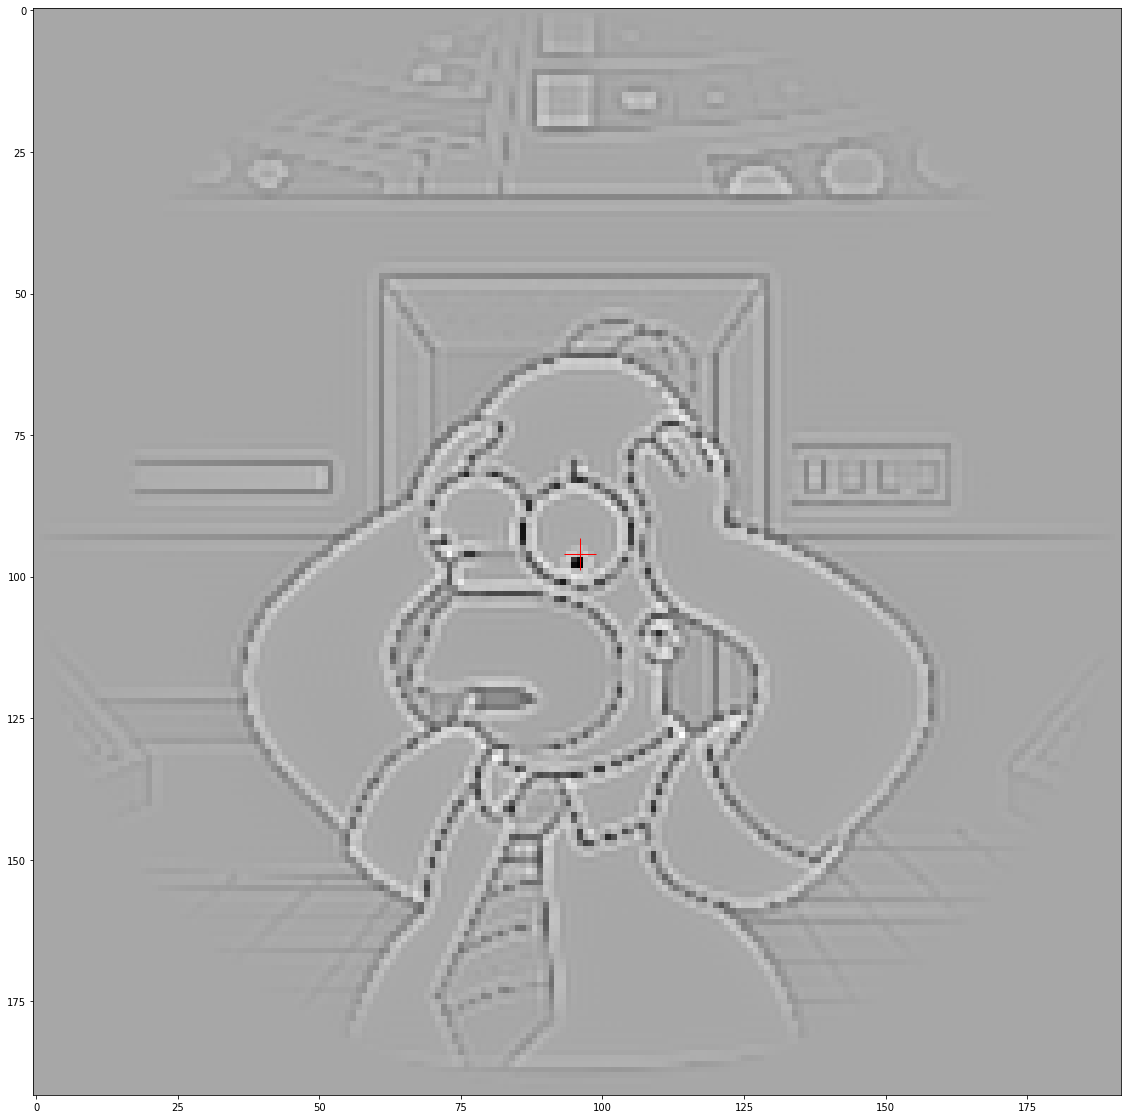

Tensor shape= torch.Size([1, 1, 192, 192])
Tensor shape= torch.Size([1, 1, 96, 96]) , n_levels= 1
Tensor shape= torch.Size([1, 1, 48, 48]) , n_levels= 2
Tensor shape= torch.Size([1, 1, 24, 24]) , n_levels= 3
Tensor shape= torch.Size([1, 3, 32, 32])


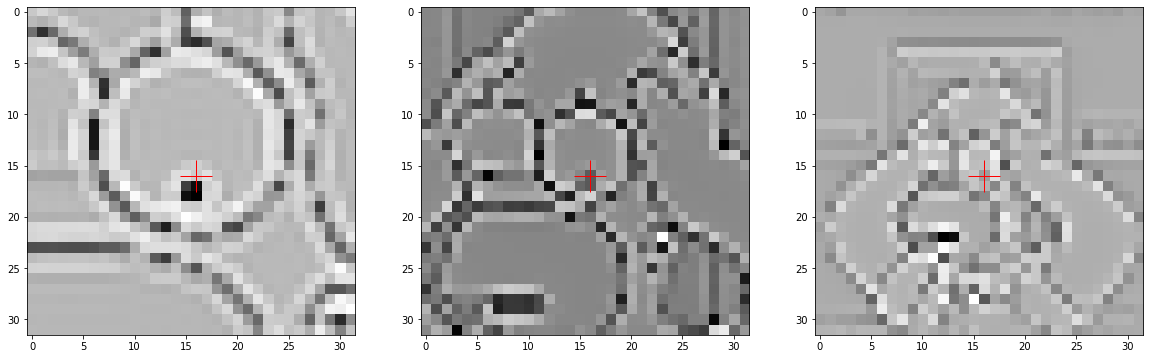

lg shape= 32 32
K shape= (32, 32)
K min max= -0.4102999708906189 1.0


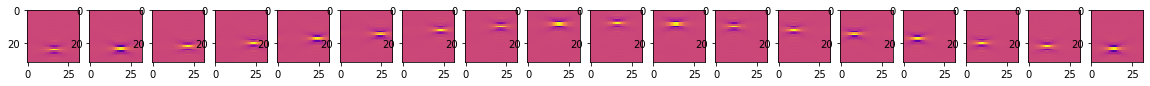

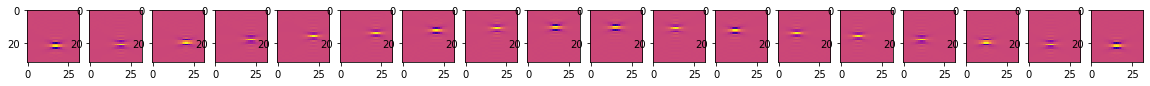

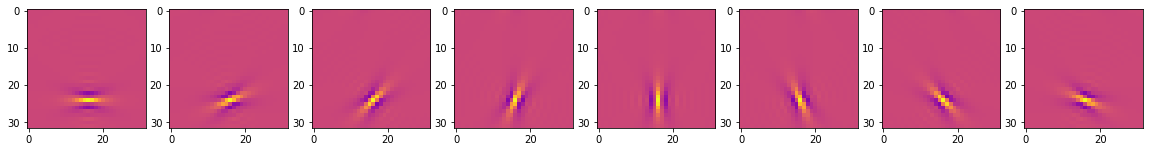

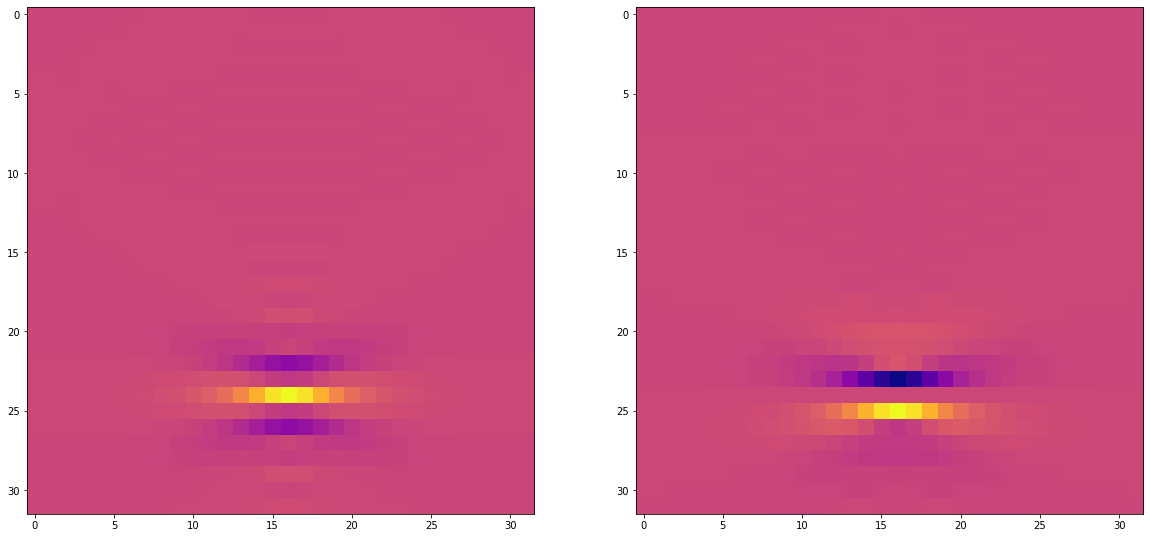

i_sublevel, sf_0, radius 0 0.25 8.0
i_sublevel, sf_0, radius 1 0.3535533905932738 5.65685424949238
K shape= torch.Size([32, 32, 2, 18, 8, 2])
K min max= tensor(-1.) tensor(1.)
Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])
76.4 µs ± 5.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])


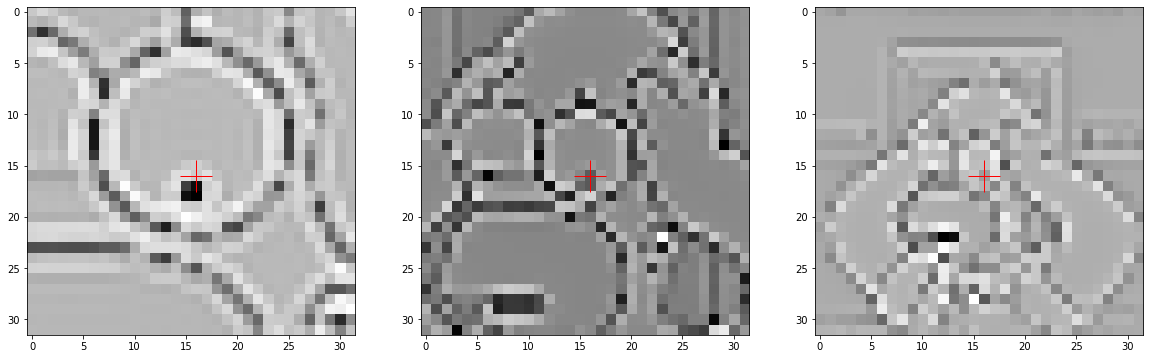

Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1024, 576])
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 576])
Tensor shape= torch.Size([576, 1024])


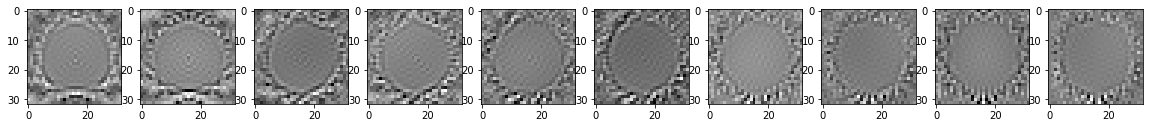

Tensor shape= torch.Size([1, 3, 32, 32])
Tensor shape= torch.Size([1, 3, 32, 32])


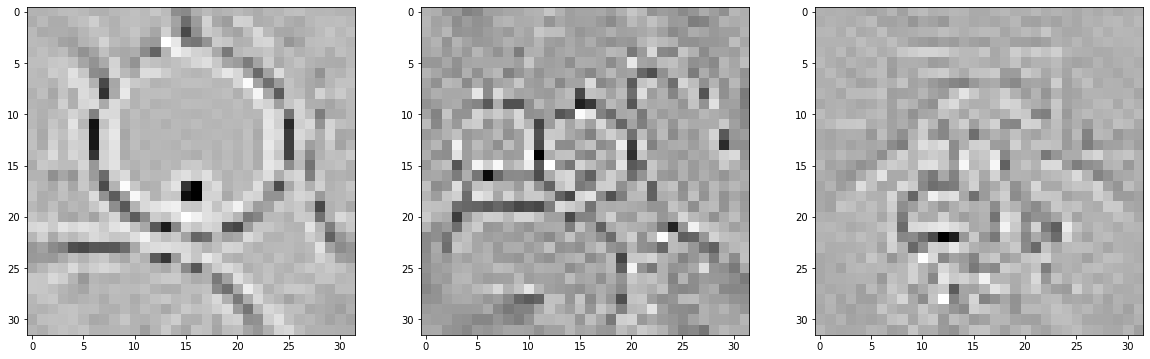

0 torch.Size([128, 1, 192, 192]) torch.Size([128, 3, 2, 18, 8, 2])
using cpu


In [1]:
%run 2020-02-11_retina_reconstruction.ipynb

In [2]:
n_epochs = 10

In [ ]:
fname = '2020-02-11_retina_reconstruction-LBFGS'

In [ ]:
%rm /tmp/{fname}.pt

In [ ]:
try:
    invert = torch.load(f'/tmp/{fname}.pt')
except:
    import time
    n_in, n_out = n_levels*n_sublevel*n_azimuth*n_theta*n_phase, np.prod(img_orig.shape)
    invert = Invert(n_in=n_in, n_out=n_out, verbose=True)

    # set a relative precision required proportional to the mask
    mask_ = im.mask.ravel()
    mask_im = torch.from_numpy(mask_[None, None, :])
    mask_w = torch.from_numpy(mask_[:, None])
    #print(mask_.shape)
    
    def init_weights(m):
        print(m)
        if type(m) == torch.nn.Linear:
            m.weight.data = K.std() * torch.randn_like(m.weight.data) * (mask_w * torch.ones((1, n_in)))
    invert.KT.apply(init_weights)

    #optimizer = torch.optim.SGD(params, lr=lr)LBFGS
    optimizer = torch.optim.LBFGS(invert.parameters(), lr=lr)
    criterion = torch.nn.MSELoss() 

    # set a relative precision required proportional to the mask
    mask_ = im.mask.ravel()
    mask_ = torch.from_numpy(mask_[None, None, :])
    #print(mask_.shape)
    # ----------
    #  Training
    # ----------
    loss_0 = None
    invert.train()
    for epoch in range(n_epochs):
        t_batch = time.time()
        for batch_idx, (target, x) in enumerate(dataloader):
            #print(target.shape, x.shape)
            target = target.squeeze(1)
            #print(target.shape, x.shape)
            target = target.reshape((target.shape[0], target.shape[1]*target.shape[2]))
            x = x.reshape((target.shape[0], n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
            #print(target.shape, x.shape)

            target, x = target.to(device), x.to(device)

            if loss_0 is None:
                loss_0 = criterion(target, torch.zeros_like(target))
            
                
            def closure():
                optimizer.zero_grad()
                im_rec = invert(x)
                loss = criterion(target, im_rec) / loss_0
                #loss = criterion(target*mask_im, im_rec*mask_im) / loss_0
                loss.backward()
                print("[Epoch %d/%d][loss: %f] [Time: %fs]" % (epoch+1, n_epochs, loss.item(), time.time()-t_batch))
                return loss
            optimizer.step(closure)            
            

    invert.eval()
    torch.save(invert, f'/tmp/{fname}.pt')

n_in, n_out= 1728 36864
Linear(in_features=1728, out_features=36864, bias=False)
[Epoch 1/10][loss: 66.659772] [Time: 0.379150s]
[Epoch 1/10][loss: 66.659749] [Time: 1.865420s]
[Epoch 1/10][loss: 66.442631] [Time: 4.118875s]
[Epoch 1/10][loss: 63.278471] [Time: 6.348867s]
[Epoch 1/10][loss: 60.030399] [Time: 8.724149s]
[Epoch 1/10][loss: 56.843948] [Time: 11.402435s]
[Epoch 1/10][loss: 53.771444] [Time: 14.315118s]
[Epoch 1/10][loss: 50.832587] [Time: 17.460702s]
[Epoch 1/10][loss: 48.033893] [Time: 20.663355s]
[Epoch 1/10][loss: 45.375714] [Time: 24.270935s]
[Epoch 1/10][loss: 42.855323] [Time: 28.058440s]
[Epoch 1/10][loss: 40.468392] [Time: 31.914956s]
[Epoch 1/10][loss: 38.209772] [Time: 35.943219s]
[Epoch 1/10][loss: 36.073917] [Time: 40.109017s]
[Epoch 1/10][loss: 34.055142] [Time: 44.391600s]
[Epoch 1/10][loss: 32.147762] [Time: 48.467891s]
[Epoch 1/10][loss: 30.346191] [Time: 52.640720s]
[Epoch 1/10][loss: 28.644992] [Time: 57.009319s]
[Epoch 1/10][loss: 27.038910] [Time: 61.54

## reconstructing one image

In [ ]:
img_tens = torch.Tensor(img_orig[None, None, ...])

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_tens[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);

In [ ]:
x = torch.tensordot(cropped_pyramid(img_tens), K, dims=2)
x = x.reshape((1, n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
im_rec = invert(x).reshape(img_tens.shape)
print(im_rec.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(im_rec[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);